In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from DAFD.rv_study.rv_utils import *
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from tqdm import tqdm
from DAFD.helper_scripts.ModelHelper import ModelHelper

Using TensorFlow backend.


regime classifier
Loading classifier
Train accuracy: 0.9887387387387387

Regression model generation_rate2
Loading Regressor
R square (R^2) for Train:                 0.987384

Regression model droplet_size2
Loading Regressor
R square (R^2) for Train:                 0.983142

Regression model generation_rate1
Loading Regressor
R square (R^2) for Train:                 0.965872

Regression model droplet_size1
Loading Regressor
R square (R^2) for Train:                 0.953238



In [2]:
# Load Dataset and sort
#chips = pd.read_csv("20210212_designspace_JETTING.csv")
chips = pd.read_csv("20210420_versatility_results_dripping.csv")
chips = chips.loc[chips["score"] != -1,:]

all_results = pd.read_csv("20210419_all_data_working.csv")
all_results = all_results.loc[all_results["regime"] == 1, :]
all_results = all_results.loc[all_results["diff"] < 50, :]
#all_results = all_results.loc[all_results["score"] != -1, :]
chips = chips.sort_values("score")

In [ ]:
MH = ModelHelper()

inferred = np.zeros(all_results.shape[0])
oil_flow = np.zeros(all_results.shape[0])
water_flow = np.zeros(all_results.shape[0])

for i, row in tqdm(all_results.iterrows(), position=0, leave=True):
    oil_flow[i], water_flow[i], inferred[i] = MH.calculate_formulaic_relations(row.to_dict())

119581it [00:20, 17840.18it/s]

In [92]:
new_results = pd.DataFrame({"inferred_diameter": inferred, "oil_flow_rate": oil_flow, "water_flow_rate": water_flow})
all_plus = pd.concat([all_results, new_results], axis=1)
dripping = all_plus.loc[all_results["regime"] == 1, :]
jetting = all_plus.loc[all_results["regime"] == 2, :]


In [ ]:
all_COMPLETE.to_csv("20210419_all_data_working.csv")

In [117]:
percent_difference_all = np.abs((all_plus.loc[:, "inferred_diameter"] - all_plus.loc[:, "droplet_size"])/all_plus.loc[:, "droplet_size"])*100
percent_difference_dripping = np.abs((dripping.loc[:, "inferred_diameter"] - dripping.loc[:, "droplet_size"])/dripping.loc[:, "droplet_size"])*100
percent_difference_jetting = np.abs((jetting.loc[:, "inferred_diameter"] - jetting.loc[:, "droplet_size"])/jetting.loc[:, "droplet_size"])*100

print(np.sum(percent_difference_all < 50)/len(percent_difference_all))
print(np.sum(percent_difference_dripping < 50)/len(percent_difference_dripping))
print(np.sum(percent_difference_jetting < 50)/len(percent_difference_jetting))


0.7762757777777778
0.6545346253114133
0.8912829656723991


In [123]:
all_COMPLETE = pd.concat([all_plus, pd.DataFrame({"diff": percent_difference_all})], axis=1)
thresh = all_COMPLETE.loc[all_COMPLETE.loc[:,"diff"]<=50, :]


In [125]:
drip_thresh = thresh.loc[thresh.loc[:, "regime"] == 1, :]
print(drip_thresh.shape[0]/thresh.shape[0])

0.4095949864323704


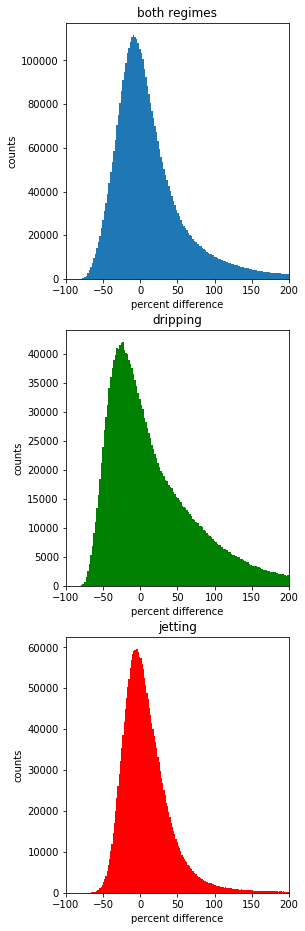

In [115]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(4,16))

ax[0].hist(percent_difference_all, bins=1000)
ax[0].set_xlim([-100, 200])
ax[0].set_xlabel("percent difference")
ax[0].set_ylabel("counts")
ax[0].set_title("both regimes")

ax[1].hist(percent_difference_dripping, bins=1000, color="g")
ax[1].set_xlim([-100, 200])
ax[1].set_xlabel("percent difference")
ax[1].set_ylabel("counts")
ax[1].set_title("dripping")

ax[2].hist(percent_difference_jetting, bins=1000, color="r")
ax[2].set_xlim([-100, 200])
ax[2].set_xlabel("percent difference")
ax[2].set_ylabel("counts")
ax[2].set_title("jetting")


#ax[0].set_title("Error in inferred droplet diameter (DRIPPING)")
plt.savefig("difference_distributions.png")

In [96]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000270514A75F8>,
      dtype=object)

LOWEST 0.012999
HIGHEST 105284.729849


Text(0, 0.5, 'Generation Rate (Hz)')

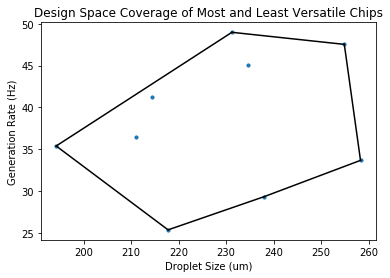

In [36]:
highest_results = all_results.loc[all_results["chip_num"]==chips.iloc[-1, 0], :]
lowest_results = all_results.loc[all_results["chip_num"]==chips.iloc[250, 0], :]

print("LOWEST %f" % chips.head(1)["score"])
print("HIGHEST %f" % chips.tail(1)["score"])


for x in [lowest_results]:
    sizes = x["droplet_size"].tolist()
    rates = x["generation_rate"].tolist()
    points = np.array([[sizes[i], rates[i]] for i in range(len(sizes))])
    hull = ConvexHull(points)
    plt.scatter(points[:,0], points[:,1], s=10)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plt.title("Design Space Coverage of Most and Least Versatile Chips")
plt.xlabel("Droplet Size (um)")
plt.ylabel("Generation Rate (Hz)")
#plt.savefig("VersatilityExtremes_Compare.png")

In [38]:
chips.tail(1).to_dict()

{'Unnamed: 0': {11379: 11379},
 'Unnamed: 0.1': {11379: 11379},
 'aspect_ratio': {11379: 1.0},
 'expansion_ratio': {11379: 2.5},
 'normalized_oil_inlet': {11379: 2.0},
 'normalized_orifice_length': {11379: 3.0},
 'normalized_water_inlet': {11379: 2.0},
 'orifice_size': {11379: 125},
 'score': {11379: 36810.615724417185},
 'size_score': {11379: 132.25651550292972},
 'rate_score': {11379: 443.0681209564209}}

In [27]:
flow_edges

,Unnamed: 0,Unnamed: 0.1,aspect_ratio,capillary_number,expansion_ratio,flow_rate_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size,size,rate,chip_num,regime
1820667,1137970,70,1.0,0.050000,2.5,17.555556,2.0,3.0,2.0,125,69.747055,21.089821,11379,1
1820676,1137960,60,1.0,0.050000,2.5,15.333333,2.0,3.0,2.0,125,74.839905,19.765011,11379,1
1820688,1137910,10,1.0,0.050000,2.5,4.222222,2.0,3.0,2.0,125,122.392868,12.602505,11379,1
1820696,1137909,9,1.0,1.050000,2.5,2.000000,2.0,3.0,2.0,125,143.676270,458.404114,11379,2
1820698,1137920,20,1.0,0.050000,2.5,6.444444,2.0,3.0,2.0,125,103.515396,13.504428,11379,1
1820708,1137930,30,1.0,0.050000,2.5,8.666667,2.0,3.0,2.0,125,96.119690,14.823030,11379,1
1820717,1137940,40,1.0,0.050000,2.5,10.888889,2.0,3.0,2.0,125,88.723984,16.201101,11379,1
1820718,1137980,80,1.0,0.050000,2.5,19.777778,2.0,3.0,2.0,125,64.825081,22.630726,11379,1
1820741,682740,0,1.0,0.050000,2.5,2.000000,2.0,3.0,2.0,125,168.276382,11.966974,11379,1
1820767,1137992,92,1.0,0.272222,2.5,22.000000,2.0,3.0,2.0,125,36.019867,455.035095,11379,1


In [44]:
edge_pts = np.unique(hull.simplices.flatten())
                    
flow_edges = lowest_results.iloc[edge_pts, :]
flow_edges
#flow_edges.to_csv("LEASTVersatile_EdgeConditions_DRIPPING.csv")

*Main Effect Analysis*

In [4]:
'''STEPS:
1) Find mean of all results.
2) Across each collection of values used (have code from before). Take mean of each at every checkpoint 
3) Plot out main effect plots for each
'''

'STEPS:\n1) Find mean of all results.\n2) Across each collection of values used (have code from before). Take mean of each at every checkpoint \n3) Plot out main effect plots for each\n'

In [5]:
mean_size = all_results["droplet_size"].mean()
mean_rate = all_results["generation_rate"].mean()


In [8]:
size_normalized = (all_results["droplet_size"]/all_results["orifice_size"])
mean_size_normalized = size_normalized.mean()

In [9]:
mean_score = chips["score"].mean()
mean_size_score = chips["size_score"].mean()
mean_rate_score = chips["rate_score"].mean()

In [10]:
meff_cols = ['aspect_ratio', 'expansion_ratio',
       'normalized_oil_inlet', 'normalized_orifice_length',
       'normalized_water_inlet', 'orifice_size']#, "capillary_number", "flow_rate_ratio"]

meff_vals = {}
for col in meff_cols:
    sweep_range = all_results[col].unique()
    size_score_avgs = []
    rate_score_avgs = []
    score_avgs = []
    size_score_std = []
    rate_score_std = []
    score_std = []
    
    
    
    for val in sweep_range:
        #size_avgs.append(size_normalized[all_results[col] == val].mean())
        size_score_avgs.append(chips.loc[chips[col] == val, "size_score"].mean())
        rate_score_avgs.append(chips.loc[chips[col] == val, "rate_score"].mean())
        score_avgs.append(chips.loc[chips[col] == val, "score"].mean())
        size_score_std.append(chips.loc[chips[col] == val, "size_score"].std())
        rate_score_std.append(chips.loc[chips[col] == val, "rate_score"].std())
        score_std.append(chips.loc[chips[col] == val, "score"].std())

        
        #meff_vals[col] = {"range": sweep_range, "size_averages": size_avgs, "rate_averages": rate_avgs}
    meff_vals[col] = {"range": sweep_range, "size_score_avgs": size_score_avgs, "rate_score_avgs": rate_score_avgs, "score_avgs": score_avgs,
                      "size_score_std": size_score_std, "rate_score_std":rate_score_std, "score_std":score_std}
    

In [11]:
pd.DataFrame(meff_vals['expansion_ratio']).T

,0,1,2,3,4,5,6,7,8
range,2.000000,2.500000,3.000000,3.500000,4.000000,4.500000,5.000000,5.500000,6.000000
size_score_avgs,111.111427,115.742813,117.223962,117.448096,115.767391,112.983135,109.495697,104.435911,98.989059
rate_score_avgs,135.106994,139.573747,142.949836,147.144219,152.805500,160.273714,168.015183,172.310127,171.802609
score_avgs,7960.463722,8438.320833,8671.915769,8917.622274,9314.433164,9769.286865,10097.140854,10082.202691,9877.871022
size_score_std,43.104616,41.289848,38.934059,36.624571,35.121015,34.098196,33.797132,34.066446,33.956461
rate_score_std,106.081063,112.256996,116.039418,119.727388,120.955778,120.608252,118.288419,114.015294,110.910849
score_std,5115.961224,5375.570471,5586.368408,5860.169638,6170.762039,6460.572963,6551.064119,6715.182463,7029.482836


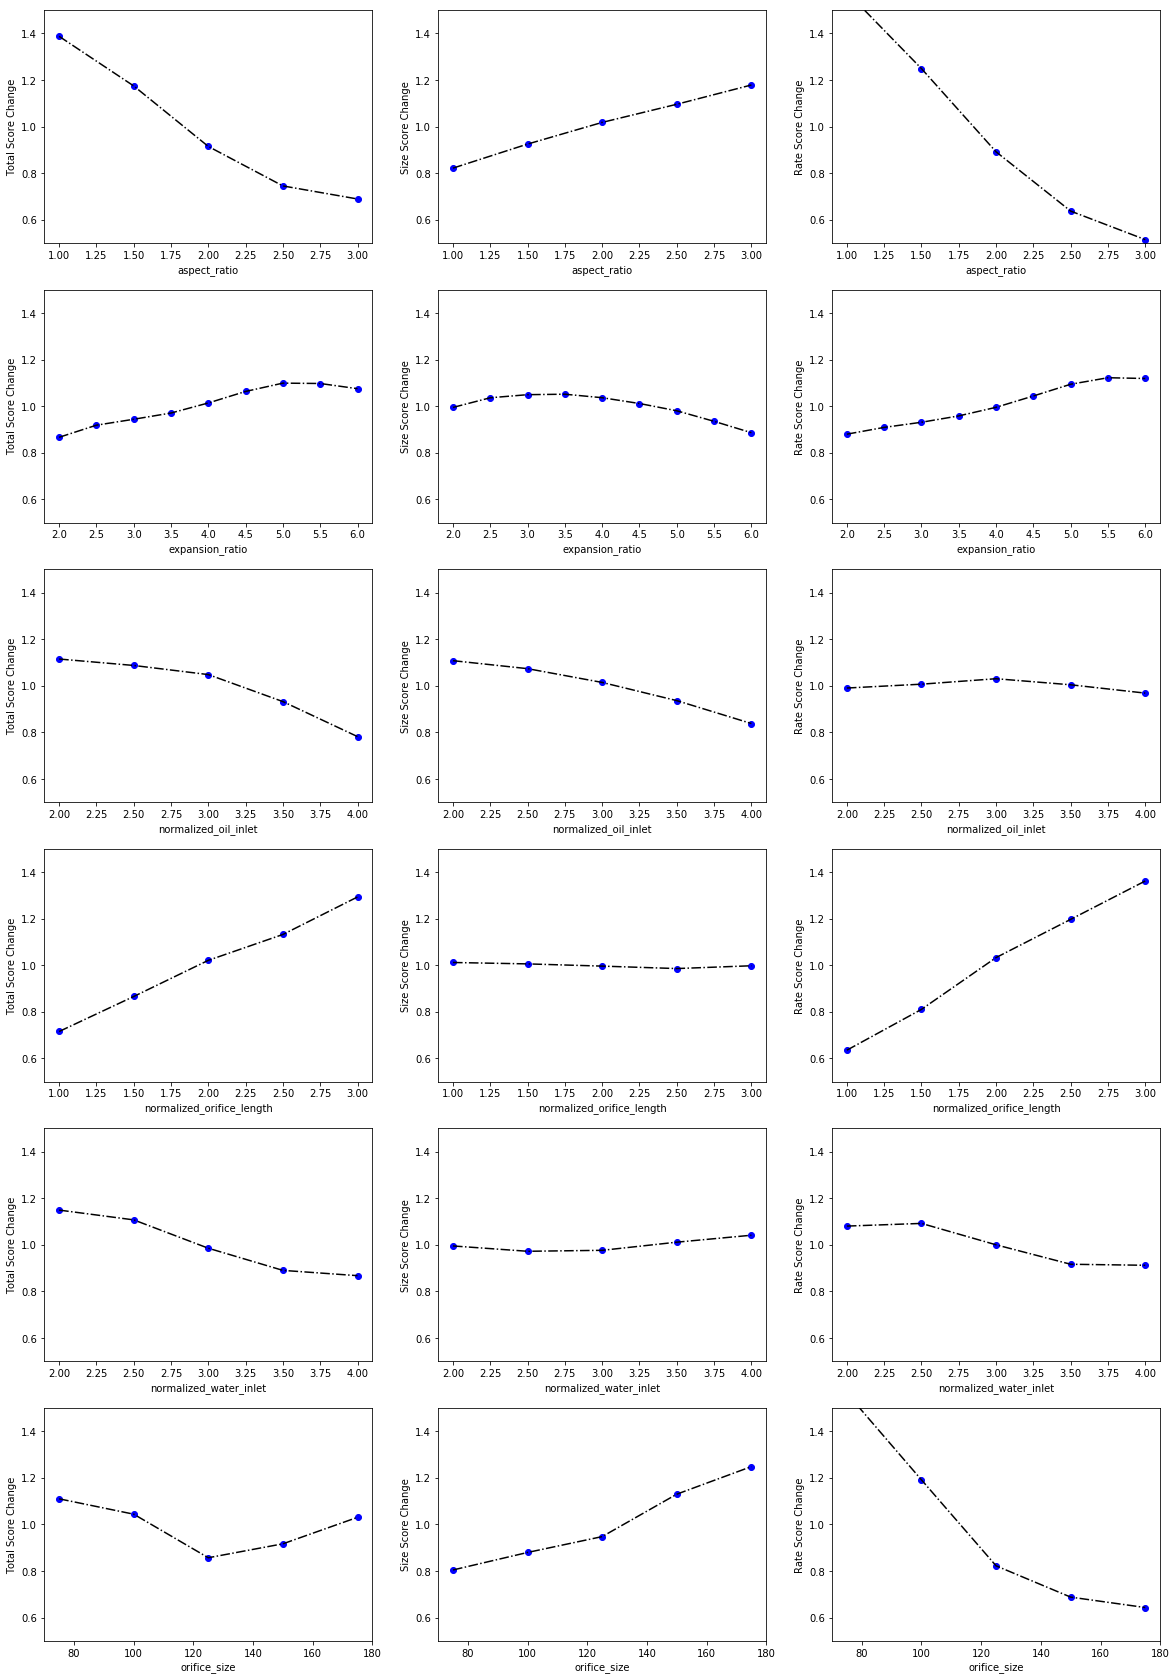

In [13]:
fig, axs = plt.subplots(6,3, figsize=[20,30])
for i, param in enumerate(meff_vals.keys()):
    param_range = meff_vals[param]["range"]
    score_normed =  meff_vals[param]["score_avgs"]/mean_score
    size_score_normed = meff_vals[param]["size_score_avgs"]/mean_size_score
    rate_score_normed = meff_vals[param]["rate_score_avgs"]/mean_rate_score
    
    score_std_normed =  meff_vals[param]["score_std"]/mean_score
    size_score_std_normed = meff_vals[param]["size_score_std"]/mean_size_score
    rate_score_std_normed = meff_vals[param]["rate_score_std"]/mean_rate_score
    
    
    
    
    #axs[i][0].errorbar(param_range, score_normed, yerr=score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i][0].plot(param_range, score_normed, "bo")
    axs[i][0].plot(param_range, score_normed, "k-.")
    
    axs[i][0].set_xlabel(param)
    axs[i][0].set_ylabel("Total Score Change")
    axs[i][0].set_ylim([0.5, 1.5])
        
    #axs[i][1].errorbar(param_range, size_score_normed, yerr=size_score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i][1].plot(param_range, size_score_normed, "bo")
    axs[i][1].plot(param_range, size_score_normed, "k-.")
    
    axs[i][1].set_xlabel(param)
    axs[i][1].set_ylabel("Size Score Change")
    axs[i][1].set_ylim([0.5, 1.5])
    
    #axs[i][2].errorbar(param_range, rate_score_normed, yerr=rate_score_std_normed, fmt="bo", ecolor="k", capsize=5)
    axs[i][2].plot(param_range, rate_score_normed, "bo")
    axs[i][2].plot(param_range, rate_score_normed, "k-.")

    axs[i][2].set_xlabel(param)
    axs[i][2].set_ylabel("Rate Score Change")
    axs[i][2].set_ylim([0.5, 1.5])
    
plt.savefig('20210420_versatility_dripping.png')

In [97]:
from sklearn.feature_selection import f_regression, mutual_info_regression


In [98]:
X = np.zeros([chips.shape[0], len(meff_cols)])
for i, col in enumerate(meff_cols):
    X[:,i] = chips.loc[:, col]
Y = chips.loc[:, "score"]

In [99]:
f_test_all, _ = f_regression(X,chips.loc[:, "score"])
f_test_size, _ = f_regression(X,chips.loc[:, "size_score"])
f_test_rate, _ = f_regression(X,chips.loc[:, "rate_score"])


In [100]:
F = pd.DataFrame([f_test_all, f_test_size, f_test_rate], columns=meff_cols, index=["score", "size_score", "rate_score"])

In [101]:
F

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,29.230258,5931.442788,3269.195117,2.476910,16535.758754,25.471230
size_score,2237.498460,19745.960965,973.030723,562.962752,8.278186,9426.816079
rate_score,834.304194,17842.086543,2573.718052,0.554035,9845.350119,1571.454412


In [57]:
mi_test_all = mutual_info_regression(X,chips.loc[:, "score"])
mi_test_size = mutual_info_regression(X,chips.loc[:, "size_score"])
mi_test_rate = mutual_info_regression(X,chips.loc[:, "rate_score"])


In [58]:
MI = pd.DataFrame([mi_test_all, mi_test_size, mi_test_rate], columns=meff_cols, index=["score", "size_score", "rate_score"])

In [59]:
F_norm = (F - F.min().min())/(F.max().max() - F.min().min())
MI_norm = (MI - MI.min().min())/(MI.max().max() - MI.min().min())


In [60]:
F

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,547.467448,5361.506359,1147.337288,613.460873,9968.090886,90.238952
size_score,2447.064411,9852.349076,772.263745,7.753868,272.789350,12642.519274
rate_score,2815.500738,11095.435757,1392.627655,532.438678,5220.052148,4352.175976


In [55]:
MI

,aspect_ratio,expansion_ratio,normalized_oil_inlet,normalized_orifice_length,normalized_water_inlet,orifice_size
score,0.101453,0.133656,0.041103,0.026897,0.172419,0.059692
size_score,0.066113,0.194648,0.016207,0.010983,0.072746,0.229236
rate_score,0.105790,0.217972,0.040201,0.015202,0.084218,0.091057
